# Chapter 3 Classification Exercises:
* JONATHAN SHER

### Setup:
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Exercise 1:

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

* The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.

In [ ]:
# import MNIST dataset and do some data exploration

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

# mnist.head()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Saving figure some_digit_plot


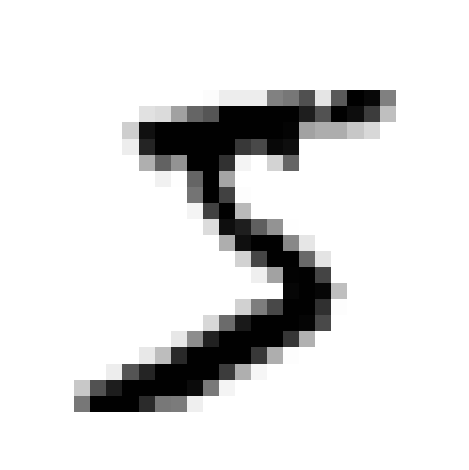

In [ ]:
X, y = mnist["data"], mnist["target"]
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [ ]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Preprocess the Data:
# The pixel values in the MNIST dataset range from 0 to 255. We'll normalize them to the range [0, 1].

X_train = X_train / 255.0
X_test = X_test / 255.0

# #Step 3: Perform Grid Search for Hyperparameter Tuning
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'weights': ['uniform', 'distance']
# }

# # Initialize the KNeighborsClassifier
# knn_clf = KNeighborsClassifier()

# # Perform grid search
# grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=3)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the corresponding accuracy
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation accuracy:", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

# Initialize the KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  23.8s
[CV 2/3] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  24.8s
[CV 3/3] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  26.5s
[CV 1/3] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  24.9s
[CV 2/3] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  25.3s
[CV 3/3] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  25.2s
[CV 1/3] END ....n_neighbors=4, weights=uniform;, score=0.968 total time=  28.7s
[CV 2/3] END ....n_neighbors=4, weights=uniform;, score=0.970 total time=  29.1s
[CV 3/3] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  28.1s
[CV 1/3] END ...n_neighbors=4, weights=distance;, score=0.972 total time=  28.3s
[CV 2/3] END ...n_neighbors=4, weights=distance;, score=0.974 total time=  28.4s
[CV 3/3] END ...n_neighbors=4, weights=distance;,

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
# Print the best parameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters: {'n_neighbors': 4, 'weights': 'distance'}
Best cross-validation accuracy: 0.9720000000000001


* Evaluate the Best Model on the Test Set
* Once we have the best hyperparameters, we can evaluate the model on the test set.

In [ ]:
from sklearn.metrics import accuracy_score

# Get the best model
best_knn_clf = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_knn_clf.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.9729


Our goal of achieving over 97% accuracy on the test set has been achieved with a test set accuracy of 97.29%

## Exercise 2
* Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 1. Function to shift an image by one pixel in a specified direction
def shift_image(image, direction):
    """
    Shift a 2D image by one pixel in the specified direction.

    Parameters:
      - image: a 2D numpy array (e.g., shape (28,28) for MNIST)
      - direction: one of 'left', 'right', 'up', 'down'

    Returns:
      - shifted: a 2D numpy array with the image shifted and the new area filled with zeros.
    """
    shifted = np.copy(image)
    if direction == 'left':
        shifted = np.roll(shifted, shift=-1, axis=1)
        shifted[:, -1] = 0
    elif direction == 'right':
        shifted = np.roll(shifted, shift=1, axis=1)
        shifted[:, 0] = 0
    elif direction == 'up':
        shifted = np.roll(shifted, shift=-1, axis=0)
        shifted[-1, :] = 0
    elif direction == 'down':
        shifted = np.roll(shifted, shift=1, axis=0)
        shifted[0, :] = 0
    else:
        raise ValueError("Direction must be 'left', 'right', 'up', or 'down'.")
    return shifted

# 2. Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 3. Create augmented training set: For each image, create 4 shifted copies (left, right, up, down)
augmented_images = []
augmented_labels = []

for image, label in zip(x_train, y_train):
    # Original image
    augmented_images.append(image)
    augmented_labels.append(label)
    # Four shifted copies
    for direction in ['left', 'right', 'up', 'down']:
        shifted_img = shift_image(image, direction)
        augmented_images.append(shifted_img)
        augmented_labels.append(label)

# Convert to numpy arrays
x_train_aug = np.array(augmented_images)
y_train_aug = np.array(augmented_labels)

# 4. Preprocess the data
x_train_aug = x_train_aug.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to include channel dimension (for CNN input)
x_train_aug = np.expand_dims(x_train_aug, -1)  # shape becomes (num_samples, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train_aug, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# 5. Build a simple CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train the model on the augmented training set
history = model.fit(x_train_aug, y_train_cat, epochs=5, batch_size=128, validation_data=(x_test, y_test_cat))

# 7. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test accuracy:", test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 145s 60ms/step - accuracy: 0.9337 - loss: 0.2261 - val_accuracy: 0.9886 - val_loss: 0.0347
Epoch 2/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 202s 60ms/step - accuracy: 0.9893 - loss: 0.0349 - val_accuracy: 0.9906 - val_loss: 0.0299
Epoch 3/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 137s 59ms/step - accuracy: 0.9940 - loss: 0.0188 - val_accuracy: 0.9905 - val_loss: 0.0295
Epoch 4/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 147s 61ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9903 - val_loss: 0.0321
Epoch 5/5
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 202s 61ms/step - accuracy: 0.9975 - loss: 0.0081 - val_accuracy: 0.9894 - val_loss: 0.0355
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9870 - loss: 0.0475
Test accuracy: 0.9894000291824341
